In [10]:
import torch 
import torchvision 
from torchvision.datasets import MNIST 
import matplotlib.pyplot as plt 
%matplotlib inline

In [6]:
# Download the training dataset 
dataset = MNIST(root= 'Mdata/', download = True)
test_dataset = MNIST(root= 'Mdata/', train = False)

In [4]:
len(dataset)

60000

label: 5


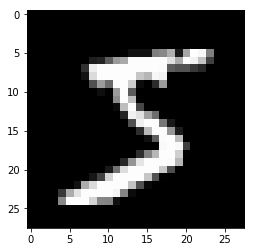

In [11]:
image, label = dataset[0]
plt.imshow(image, cmap = "gray")
print('label:', label)

## We need to transfrom images into tensors 


In [13]:
import torchvision.transforms as transforms
dataset = MNIST(root ='Mdata/', train = True, transform=transforms.ToTensor())
image, label = dataset[0]
print(image.shape,label)

torch.Size([1, 28, 28]) 5


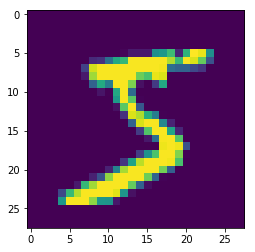

In [14]:
plt.imshow(image[0,:,:])

In [18]:
import numpy as np 

def split_indices(n, val_pct):
    n_val = int(val_pct*n)
    indxs = np.random.permutation(n)
    
    return indxs[n_val:], indxs[:n_val]

In [25]:
train_indx, val_indx = split_indices(len(dataset),val_pct = 0.2)
print(len(train_indx), len(val_indx))

48000 12000


In [22]:
from torch.utils.data.sampler import SubsetRandomSampler
from torch.utils.data.dataloader import DataLoader

In [27]:
batch_size = 100 
# This is saying, when we sample from the dataset, we only consider samples in the train_indices list
train_sampler = SubsetRandomSampler(train_indx)
train_loader = DataLoader(dataset,
                         batch_size,
                         sampler = train_sampler)

# validation sampler and data loader 
val_sampler = SubsetRandomSampler(val_indx)
val_loader = DataLoader(dataset,
                       batch_size,
                       sampler= val_sampler)

In [30]:
import torch.nn as nn 
input_size = 28*28
num_classes = 10 

# model for logistic regression 
model = nn.Linear(input_size, num_classes)

In [32]:
print(model.weight.shape)

torch.Size([10, 784])


In [35]:
for images, labels in train_loader:
    print(labels)
    print(images.shape)
    #outputs=model(images)
    break

tensor([3, 0, 7, 1, 3, 6, 3, 5, 8, 9, 1, 0, 7, 1, 1, 7, 7, 5, 6, 2, 1, 4, 2, 6,
        4, 0, 2, 9, 7, 6, 9, 4, 7, 4, 8, 6, 0, 1, 3, 1, 4, 8, 5, 2, 8, 8, 2, 6,
        2, 8, 5, 3, 7, 6, 9, 9, 0, 0, 1, 9, 6, 4, 0, 7, 9, 3, 7, 9, 9, 9, 9, 3,
        4, 5, 6, 0, 2, 9, 2, 3, 2, 4, 0, 5, 0, 8, 8, 9, 1, 1, 0, 2, 1, 6, 2, 8,
        3, 4, 7, 9])
torch.Size([100, 1, 28, 28])


Here we extend the nn.Module class. We do inheritence by `super().__init__()`
 

In [81]:
class MnistModel(nn.Module):
    def __init__(self):
        super().__init__()
        self.linear = nn.Linear(input_size,num_classes)
    def forward(self,xb):
        xb = xb.reshape(-1,28*28)
        out = self.linear(xb)
        return out 
    
model = MnistModel()
        

In [82]:
list(model.parameters())

[Parameter containing:
 tensor([[ 0.0078, -0.0071, -0.0142,  ..., -0.0136,  0.0230, -0.0278],
         [-0.0202,  0.0312, -0.0126,  ...,  0.0278,  0.0082, -0.0232],
         [ 0.0202,  0.0317, -0.0041,  ...,  0.0158,  0.0095,  0.0200],
         ...,
         [-0.0256, -0.0204, -0.0143,  ..., -0.0142,  0.0019,  0.0345],
         [-0.0034,  0.0127,  0.0193,  ...,  0.0175,  0.0068, -0.0230],
         [-0.0040, -0.0245, -0.0321,  ..., -0.0192, -0.0013, -0.0350]],
        requires_grad=True), Parameter containing:
 tensor([ 0.0107, -0.0186,  0.0088, -0.0240, -0.0298, -0.0024,  0.0280,  0.0016,
         -0.0221,  0.0201], requires_grad=True)]

In [44]:

for images, labels in train_loader: 
    print(labels)
    outputs= model(images)
    break

tensor([1, 5, 9, 5, 9, 4, 1, 1, 8, 9, 3, 2, 0, 2, 2, 7, 8, 6, 9, 3, 1, 5, 8, 0,
        0, 9, 1, 5, 1, 0, 3, 3, 3, 1, 4, 0, 7, 3, 0, 3, 2, 3, 8, 1, 6, 1, 1, 1,
        1, 1, 1, 1, 3, 2, 3, 2, 6, 2, 2, 0, 7, 5, 8, 1, 3, 3, 9, 4, 9, 7, 4, 3,
        7, 6, 3, 2, 7, 9, 5, 2, 2, 6, 8, 1, 7, 7, 8, 1, 2, 5, 0, 5, 0, 0, 3, 7,
        6, 8, 9, 9])


In [49]:
print(outputs.shape)


torch.Size([100, 10])


In [53]:
# We need to pass each output to a softmax. The predictions are clearly very shit right now, because we have not trained anything...

import torch.nn.functional as F
probs = F.softmax(outputs, dim=1)
print(probs[0])
max_probs, preds = torch.max(probs, dim = 1)
print(preds)

tensor([0.1039, 0.0952, 0.0992, 0.0978, 0.1003, 0.0963, 0.1143, 0.0979, 0.0912,
        0.1039], grad_fn=<SelectBackward>)
tensor([6, 6, 5, 5, 7, 6, 5, 5, 6, 4, 2, 5, 9, 6, 9, 9, 6, 9, 6, 9, 9, 6, 6, 2,
        8, 5, 9, 6, 5, 9, 9, 5, 6, 5, 3, 2, 5, 6, 5, 2, 1, 6, 6, 6, 9, 6, 6, 7,
        7, 9, 7, 9, 6, 5, 6, 5, 9, 5, 5, 9, 5, 4, 6, 6, 9, 6, 9, 5, 5, 5, 6, 9,
        5, 9, 5, 5, 7, 5, 5, 5, 9, 9, 6, 2, 6, 6, 5, 6, 5, 5, 9, 6, 9, 9, 2, 5,
        9, 5, 5, 6])


## Evaluation metric and loss Function 
We would like to evaluate how well the model is performing. A natrual way would be to find percentage of labels.
However this can't be used by the operator because 

1. this can't be differentiated. torch.max and == are not continuous and non-differentiable operations.  
2. It also doesnt take into account the probabiolities predicted by the model so it doesnt provide sufficient feedback for incremental improvements 


In [56]:

def accuracy(l1,l2):
    return torch.sum(l1==l2).item()/len(l1)

In [57]:
accuracy(preds, labels)

0.05

### Cross entropy! 
This is widely used for all kinds of classification. it takes the form 

$$ D = - \sum y_i ln \hat y_i $$

For classification its trying to maximise the sum of the probabilities predicted of the right class and saying we dont care about the others. 

Pytorch implements this for us. Note this does the softmax for us so we dont need to do it again. 

In [63]:
loss_fn = F.cross_entropy 
# loss for current batch of data 
loss = loss_fn(F.softmax(outputs,dim=1), labels)
loss = loss_fn(outputs, labels)

print(loss)

tensor(2.3246, grad_fn=<NllLossBackward>)


### Optimizer
Again, use the stochastic gradient descent. Use a higher learning rate this time. 
 parameters like batch size, learning rate etc are called hyperparameters. They are picked before training. Subject to experimentation. 
 



In [64]:
learning_rate = 0.001
optimizer = torch.optim.SGD(model.parameters(), lr= learning_rate)


Define a function for calculating batch loss , `loss_batch`. it does the following: 
1. calculate the loss of the function 
2. compute the gradient 
3. update the parameters 
4. reset gradients 
5. compute metric 


In [65]:
def loss_batch(model, loss_func, xb,yb, opt=None, metric = None):
    preds = model(xb)
    loss = loss_func(preds, yb)
    if opt is not None: 
        # compute gradients 
        loss.backward()
        # Update parameters 
        opt.step()
        # reset the gradients 
        opt.zero_grad()
        
    metric_result = None 
    if metric is not None: 
        # compute the metric 
        metric_result = metric(preds, yb)
    return loss.item(), len(xb), metric_result
        

In [74]:
def evaluate(model, loss_fun, valid_dl, metric = None):
    with torch.no_grad(): # we do not require the gradient at all for this! 
        
        # pass each batch into the model
        results = [loss_batch(model, loss_fun, xb, yb, metric = metric ) for xb, yb in valid_dl]
        
        # separate losses, counts and metrics 
        losses, nums, metrics = zip(*results)
        
        # Total size of dataset 
        total = np.sum(nums)
        
        # Avg loss across batches 
        avg_loss = np.sum(np.multiply(losses,nums))/total
        
        avg_metric = None 
        if metric is not None:
            # avg. of metric across batches 
            avg_metric = np.sum(np.multiply(metrics, nums))/total 
    return avg_loss, total, avg_metric 

In [73]:
results = [[1,2,3],[2,3,5],[2,3,6]]
a, b,c = zip(*results)
print(zip(*results))
a

(1, 2, 2)

In [86]:
def accuracy(outputs, labels):
    # preds is the index of the max values 
    _, preds = torch.max(outputs, dim=1)
    return torch.sum(preds ==labels).item()/len(preds)
    

### Now we can see how it performs: 


In [91]:
val_loss, total, val_acc = evaluate(model, loss_fn, val_loader, metric = accuracy)

In [92]:
print(val_acc)

0.6766666666666666


## Finally we train the model! define a fit function 

In [97]:
def fit(epochs, model, loss_fun, opt, train_dl, valid_dl, metrics=None):
    for epoch in range(epochs):
        
        # training 
        for xb, yb in train_dl: 
            loss, _, _ = loss_batch(model, loss_fn, xb, yb, opt)
        
        # evaluation 
        result = evaluate(model, loss_fn, valid_dl, metrics)
        val_loss, total, val_metric = result 
        
        # print progress : 
        if metrics is None: 
            print("Epoch [%d / %d], loss : %4f" % (epoch +1, epochs, val_loss))
            
        else: 
            print("Epoch [%d / %d], loss: %4f, %s: %4f" % (epoch+1, epochs, val_loss, metrics.__name__, val_metric))

In [98]:
model = MnistModel()
optimizer = torch.optim.SGD(model.parameters(), lr = learning_rate)
fit(5, model, F.cross_entropy, optimizer,train_loader, val_loader, metrics = accuracy)

Epoch [1 / 5], loss: 1.875479, accuracy: 0.642167
Epoch [2 / 5], loss: 1.580070, accuracy: 0.737500
Epoch [3 / 5], loss: 1.372327, accuracy: 0.767917
Epoch [4 / 5], loss: 1.222847, accuracy: 0.785667
Epoch [5 / 5], loss: 1.111985, accuracy: 0.798167


## Testing with individual images 

In [103]:
img, label = dataset[0]
img.shape

torch.Size([1, 28, 28])

In [104]:
img.unsqueeze(0).shape

torch.Size([1, 1, 28, 28])

In [110]:
def predict_image(img,model):
    xb = img.unsqueeze(0)
    yb = model(xb)
    _, preds = torch.max(yb, dim=1)
    return preds

tensor([0])


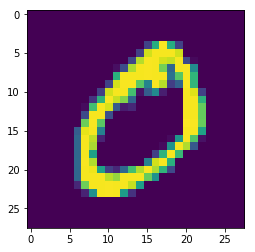

In [111]:
img, label = dataset[1]
plt.imshow(img[0])
print(predict_image(img, model))